# Context & Background

Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


## Definition of problem 

<li>Predict the price of used cars and can help the business in devising profitable strategies using differential pricing.</li>

<li>Help the business knows the market price, so that it will never sell anything below it. </li>

## Objective
<li>
Explore and visualize the dataset.</li>
<li>Build a linear regression model to predict the prices of used cars.</li>
<li>Generate a set of insights and recommendations that will help the business.
</li>    

## Data background
</n>
<li>S.No. : Serial Number</li>
<li>Name : Name of the car which includes Brand name and Model name</li>
<li>Location : The location in which the car is being sold or is available for purchase Cities</li>
<li>Year : Manufacturing year of the car</li>
<li>Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.</li>
<li>Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)</li>
<li>Transmission : The type of transmission used by the car. (Automatic / Manual)</li>
<li>Owner : Type of ownership</li>
<li>Mileage : The standard mileage offered by the car company in kmpl or km/kg</li>
<li>Engine : The displacement volume of the engine in CC.</li>
<li>Power : The maximum power of the engine in bhp.</li>
<li>Seats : The number of seats in the car.</li>
<li>New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)</li>
<li>Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)</li>

# Starting to code 

## Import Necessary Library

In [1]:
### Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### To enable plotting graphs in Jupyter notebook
%matplotlib inline

## Load the data set 

In [2]:
# Load the data into pandas dataframe
path ='C:/Users/srajamani/Downloads/Python3-GL-Olympus/Supervised learning wk1/used_cars_data.csv'
df_copy=pd.read_csv(path)

## Explore the dataset

### Make a copy of data

In [3]:
# let us make another copy of data
df = df_copy.copy()


### Look into the sample first few data set

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Look into the sample last few data set

In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


### Shape of data -No of rows and column

In [6]:
df.shape

(7253, 14)

### Infer the Data types

In [7]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

### FInd the missing values

In [8]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

###  Summary of Data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


### USING INFO

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# Data Preprocessing

## Fix the data types

### Drop S.NO and New Price

In [11]:
#Dropping s.no as it is not of much importance and New Price as most of the values in it is missing
df = df.drop('S.No.', axis=1)
df = df.drop('New_Price', axis=1)

### Convert Mileage,Engine,Power,Price into numerical data type

In [12]:
df[['Mileage','Engine']] = df[['Mileage','Engine']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df[['Power']] = df[['Power']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)
df.head(3) # Find the sample after removing the character at the end 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50


In [13]:
#df[['Power']] = df[['Power']].replace(to_replace=r'\D+', value='', regex=True)

In [14]:
#nba["College"].fillna("No College", inplace = True)
df['Mileage'].isna().sum()

2

In [15]:
df['Power'].isnull().values.any()

True

### Convert Datatype into Numerical columns and categorical data types

In [16]:
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Engine'] = df['Engine'].astype('float')
#df['Power'] = df['Power'].astype('float')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Transmission']=df['Transmission'].astype('category')
df['Mileage']=df['Mileage'].astype('float')
#df['Seats']=df['Seats'].astype('int')

In [17]:
df = df.astype({"Seats": 'float64'})


In [18]:
df = df.astype({"Seats": 'category'})

In [19]:
#df = df.astype({"Power": 'category'})

In [20]:

df['Power'] = df['Power'].replace('-', np.nan)
df = df.dropna(axis=0, subset=['Power'])


In [21]:
df = df.dropna(axis=0, subset=['Mileage'])

In [22]:
df = df.dropna(axis=0, subset=['Seats'])
df = df.dropna(axis=0, subset=['Price'])

In [23]:
df.shape

(5975, 12)

In [24]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5975 non-null   object  
 1   Location           5975 non-null   category
 2   Year               5975 non-null   int64   
 3   Kilometers_Driven  5975 non-null   int64   
 4   Fuel_Type          5975 non-null   category
 5   Transmission       5975 non-null   category
 6   Owner_Type         5975 non-null   category
 7   Mileage            5975 non-null   float64 
 8   Engine             5975 non-null   float64 
 9   Power              5975 non-null   object  
 10  Seats              5975 non-null   category
 11  Price              5975 non-null   float64 
dtypes: category(5), float64(3), int64(2), object(2)
memory usage: 403.9+ KB


#extract the power without the CC at the end

### Add CarBrand and Car model in columns

In [26]:
df[['CarBrand','Carmodel']]=df.Name.str.split(" ",1,expand=True).rename({0:"CarBrand",1:"CarModel"},axis=1)

In [27]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CarBrand,Carmodel
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,Honda,Jazz V


## Use Groupby function to analyse the data and get insight out of it 

### Group by Make of the Car

In [28]:
df_byModel=df.groupby('CarBrand').agg({'Price': ['mean', 'min', 'max']})
#df_byModel.first()
print(df_byModel)

                    Price                
                     mean     min     max
CarBrand                                 
Ambassador       1.350000    1.35    1.35
Audi            25.537712    7.50   72.94
BMW             25.439618    6.30   93.67
Bentley         59.000000   59.00   59.00
Chevrolet        3.044463    0.75    9.87
Datsun           3.049231    2.25    3.95
Fiat             3.340800    0.55    7.71
Force            9.333333    8.00   12.00
Ford             6.900067    0.69   56.80
Honda            5.430948    0.90   17.50
Hyundai          5.363673    0.45   23.00
ISUZU           12.045000    8.00   16.09
Isuzu           20.000000   20.00   20.00
Jaguar          37.632250   16.00  100.00
Jeep            18.718667   15.00   23.91
Lamborghini    120.000000  120.00  120.00
Land            39.861053   11.00  160.00
Mahindra         8.027638    1.50   17.63
Maruti           4.538730    0.45   11.50
Mercedes-Benz   26.809874    3.90   90.00
Mini            26.896923   17.00 

In [29]:
df_byModel.describe()

Price                        
             mean         min         max
count   31.000000   31.000000   31.000000
mean    18.777255   10.429032   39.482903
std     23.814258   23.191246   39.029902
min      1.350000    0.440000    1.350000
25%      5.022811    1.125000   13.005000
50%      9.333333    2.250000   23.910000
75%     25.488665    8.000000   57.900000
max    120.000000  120.000000  160.000000

In [30]:
#df_byModel.get_group('Lamborghini')

### Group by Fueltype


In [31]:
df_Fueltype=df.groupby('Fuel_Type')
df_Fueltype.first()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CarBrand,Carmodel
Fuel_Type,,,,,,,,,,,,,
CNG,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
Diesel,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Manual,First,19.67,1582.0,126.2,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPG,Hyundai EON LPG Era Plus Option,Hyderabad,2012.0,75000.0,Manual,First,21.10,814.0,55.2,5.0,2.35,Hyundai,EON LPG Era Plus Option
Petrol,Honda Jazz V,Chennai,2011.0,46000.0,Manual,First,18.20,1199.0,88.7,5.0,4.50,Honda,Jazz V


In [32]:
pd.set_option('float_format', '{:f}'.format)
df_Fueltype.describe().T

Fuel_Type                         CNG         Diesel  Electric          LPG  \
Year              count     56.000000    3195.000000  0.000000    10.000000   
                  mean    2014.000000    2013.754304       nan  2010.800000   
                  std        2.593699       2.793573       nan     2.097618   
                  min     2005.000000    1998.000000       nan  2007.000000   
                  25%     2013.000000    2012.000000       nan  2010.000000   
                  50%     2014.000000    2014.000000       nan  2011.500000   
                  75%     2015.250000    2016.000000       nan  2012.000000   
                  max     2019.000000    2019.000000       nan  2014.000000   
Kilometers_Driven count     56.000000    3195.000000  0.000000    10.000000   
                  mean   55446.053571   67638.107355       nan 59966.200000   
                  std    23016.571209  120816.174029       nan 17012.437220   
                  min    10600.000000    1000.000000       nan 17000.000000   
                  25%    40750.000000   41000.000000       nan 55250.000000   
                  50%    56500.000000   60000.000000       nan 64636.500000   
                  75%    72000.000000   80324.500000       nan 71500.000000   
                  max   100000.000000 6500000.000000       nan 75000.000000   
Mileage           count     56.000000    3195.000000  0.000000    10.000000   
                  mean      25.418036      18.639484       nan    19.385000   
                  std        5.953456       4.936058       nan     5.340363   
                  min       13.200000       0.000000       nan    13.450000   
                  25%       22.100000      14.840000       nan    14.412500   
                  50%       26.600000      19.010000       nan    18.250000   
                  75%       27.737500      22.690000       nan    24.925000   
                  max       33.540000      28.400000       nan    26.200000   
Engine            count     56.000000    3195.000000  0.000000    10.000000   
                  mean    1091.053571    1861.373083       nan  1027.400000   
                  std      220.976627     588.061797       nan    84.410637   
                  min      796.000000     793.000000       nan   814.000000   
                  25%      998.000000    1396.000000       nan   998.000000   
                  50%      998.000000    1598.000000       nan  1061.000000   
                  75%     1196.000000    2179.000000       nan  1086.000000   
                  max     1798.000000    4806.000000       nan  1086.000000   
Price             count     56.000000    3195.000000  0.000000    10.000000   
                  mean       3.516786      12.839934       nan     2.487000   
                  std        1.434187      12.823063       nan     0.648606   
                  min        1.200000       0.600000       nan     1.450000   
                  25%        2.850000       4.850000       nan     2.030000   
                  50%        3.250000       7.750000       nan     2.600000   
                  75%        3.822500      16.500000       nan     3.037500   
                  max        8.350000     160.000000       nan     3.200000   

Fuel_Type                      Petrol  
Year              count   2714.000000  
                  mean    2012.950995  
                  std        3.674083  
                  min     1998.000000  
                  25%     2011.000000  
                  50%     2014.000000  
                  75%     2016.000000  
                  max     2019.000000  
Kilometers_Driven count   2714.000000  
                  mean   48183.728077  
                  std    32528.855928  
                  min      171.000000  
                  25%    26985.750000  
                  50%    45000.000000  
                  75%    63807.750000  
                  max   620000.000000  
Mileage           count   2714.000000  
                  mean      17.483990  


### Groupby Transmission

In [33]:
df_Transmission=df.groupby('Transmission')
df_Transmission.first()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,CarBrand,Carmodel
Transmission,,,,,,,,,,,,,
Automatic,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,15.200000,1968.000000,140.8,5.000000,17.740000,Audi,A4 New 2.0 TDI Multitronic
Manual,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.600000,998.000000,58.16,5.000000,1.750000,Maruti,Wagon R LXI CNG


In [34]:
df_Transmission=df.groupby('Transmission').agg({'Price': ['mean', 'min', 'max']})
print(df_Transmission)

                 Price                    
                  mean      min        max
Transmission                              
Automatic    19.876852 1.500000 160.000000
Manual        5.345241 0.440000  40.000000


### Groupby Owner_Type

In [35]:
df_OwnerType=df.groupby('Owner_Type')
df_OwnerType.first()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,CarBrand,Carmodel
Owner_Type,,,,,,,,,,,,,
First,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.600000,998.000000,58.16,5.000000,1.750000,Maruti,Wagon R LXI CNG
Fourth & Above,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,12.800000,2494.000000,102,7.000000,4.000000,Toyota,Innova 2.5 V Diesel 7-seater
Second,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.200000,1968.000000,140.8,5.000000,17.740000,Audi,A4 New 2.0 TDI Multitronic
Third,Hyundai Grand i10 Sportz,Chennai,2015,54000,Petrol,Manual,18.900000,1197.000000,82,5.000000,3.600000,Hyundai,Grand i10 Sportz


In [36]:
df_OwnerType=df.groupby('Owner_Type').agg({'Price': ['mean', 'min', 'max']})
print(df_OwnerType)

                  Price                    
                   mean      min        max
Owner_Type                                 
First          9.979721 0.500000 160.000000
Fourth & Above 3.396250 1.970000   5.500000
Second         7.622644 0.440000  90.000000
Third          4.956937 0.450000 120.000000


In [37]:
df_OwnerType.describe()

Price                    
          mean      min        max
count 4.000000 4.000000   4.000000
mean  6.488888 0.840000  93.875000
std   2.908757 0.753790  65.524010
min   3.396250 0.440000   5.500000
25%   4.566765 0.447500  68.875000
50%   6.289791 0.475000 105.000000
75%   8.211913 0.867500 130.000000
max   9.979721 1.970000 160.000000

### Group by Power of the car

In [90]:
df_Power=df.groupby('Power').agg({'Price': ['mean', 'min', 'max']})
print(df_Power)

           Price                   
            mean      min       max
Power                              
        3.246408 0.550000 19.625000
100     6.614259 1.100000 12.600000
100.6  11.100513 4.950000 15.200000
101     1.582500 1.370000  1.850000
102     8.302105 1.200000 15.650000
...          ...      ...       ...
98.79   3.750000 3.750000  3.750000
98.82   3.820000 3.350000  4.290000
98.96   9.078889 7.690000 11.650000
99      5.601176 2.500000  8.410000
99.6    5.024000 1.300000  7.990000

[371 rows x 3 columns]


In [93]:
df_carbyPower=df.groupby('Power')
df_Power.describe()

Price                      
            mean        min        max
count 371.000000 371.000000 371.000000
mean    9.580647   7.510499  11.625350
std     6.576795   6.716344   6.633740
min     0.765833   0.440000   0.910000
25%     3.825000   2.250000   5.500000
50%     7.000000   4.500000   9.950000
75%    16.746875  11.835000  19.625000
max    19.625000  19.625000  19.625000

# Explaratory data analysis

## Univariate analysis

#### Analysing on Categorical Values

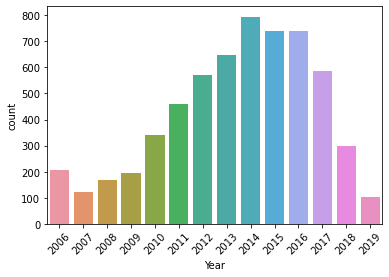

In [87]:
plt.xticks(rotation=45)
sns.countplot(df['Year'])

In [114]:
### We see most of them are by year 2014-2017 and other years are less comparetively.

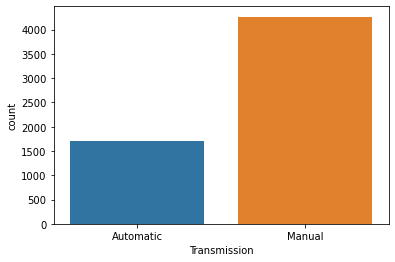

In [84]:
sns.countplot(df['Transmission'])

In [115]:
### Automatic cars that comes for slae is less in nubers than Manual cars.

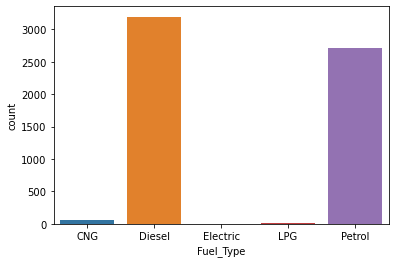

In [85]:
sns.countplot(df['Fuel_Type'])

In [116]:
### Diesel and Petrol are the most available in market than electric and LPG and CNG Fuel type cars

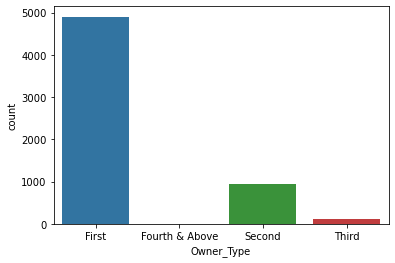

In [86]:
sns.countplot(df['Owner_Type'])

In [117]:
### First owned car are teh most available when compared with other type such as second third and fourth & Above.

## BiVariate analysis

#### Analysing Numerical Variables

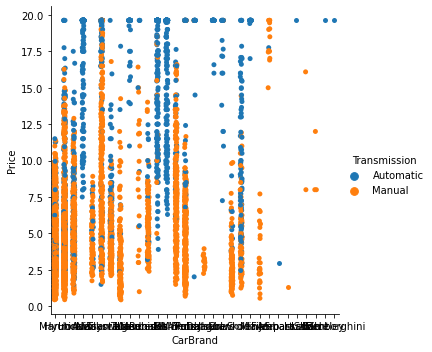

In [109]:

sns.catplot(y='Price',x='CarBrand',hue='Transmission',data=df)

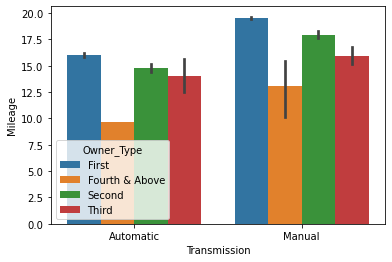

In [112]:
sns.barplot(y='Mileage',x='Transmission',hue='Owner_Type',data=df)

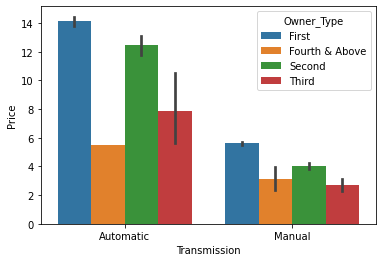

In [113]:
sns.barplot(y='Price',x='Transmission',hue='Owner_Type',data=df)

           Price                   
            mean      min       max
Power                              
        3.671165 0.550000 43.000000
100     6.614259 1.100000 12.600000
100.6  11.100513 4.950000 15.200000
101     1.582500 1.370000  1.850000
102     8.302105 1.200000 15.650000
...          ...      ...       ...
98.79   3.750000 3.750000  3.750000
98.82   3.820000 3.350000  4.290000
98.96   9.078889 7.690000 11.650000
99      5.601176 2.500000  8.410000
99.6    5.024000 1.300000  7.990000

[371 rows x 3 columns]


# Illustrate the insights based on EDA 4 Key meaningful observations on the relationship between variables

## Milage and Different car brands on automatic and Manual cars

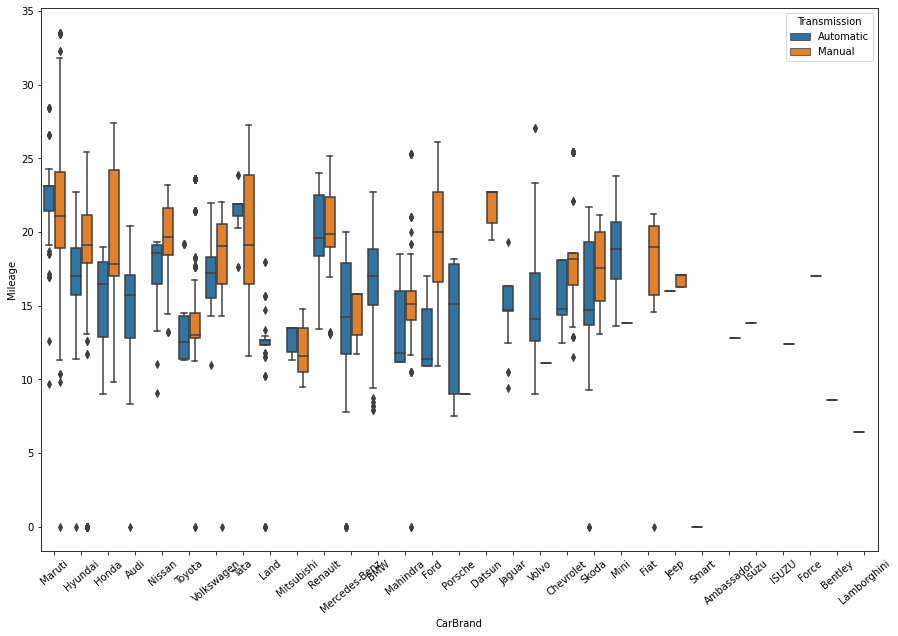

In [40]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=40)
sns.boxplot(y='Mileage', x='CarBrand', data=df,hue=df.Transmission)

## Mileage based on Owner_Type in Manual and Automatic cars

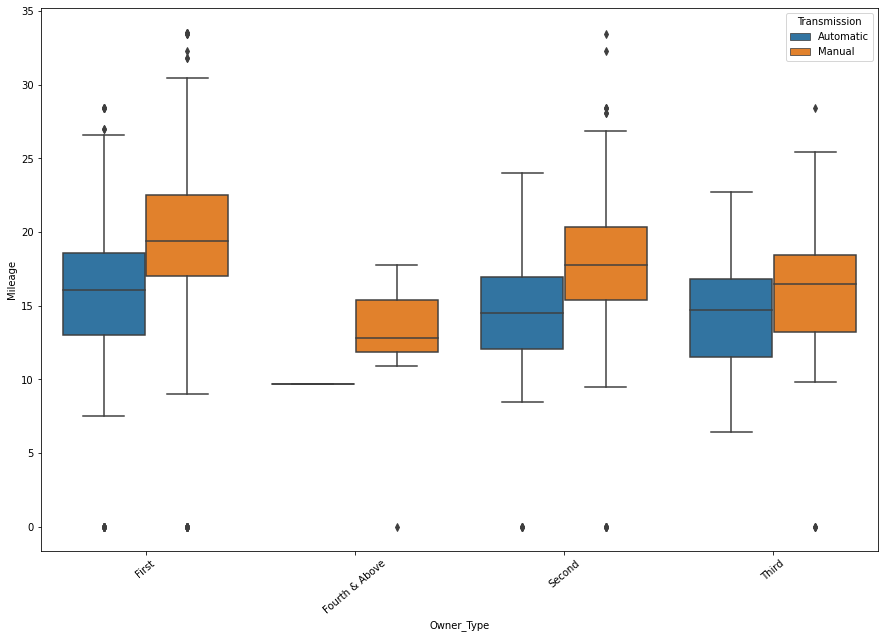

In [41]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=40)
sns.boxplot(y='Mileage', x='Owner_Type', data=df,hue=df.Transmission)

## Mileage based on Carseats in Manual and Automatic cars

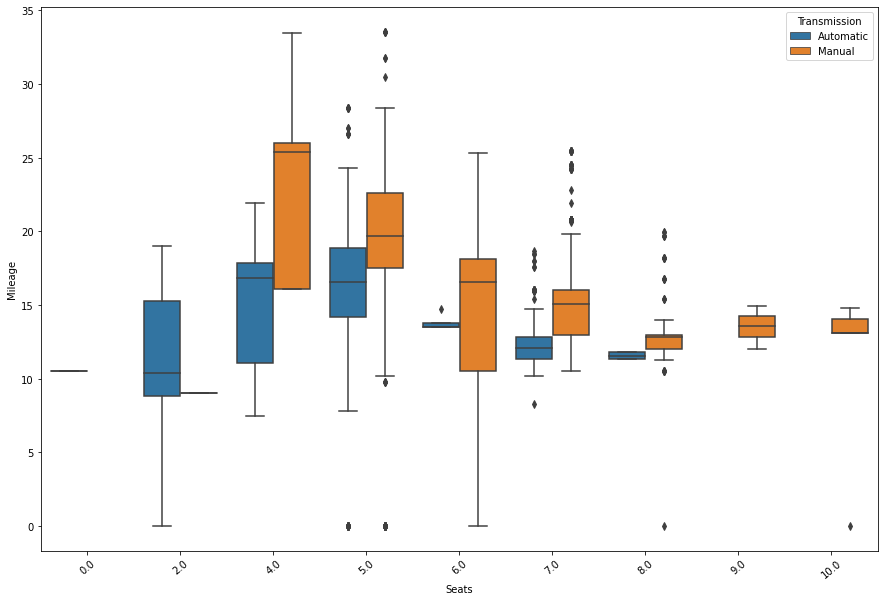

In [42]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=40)
sns.boxplot(y='Mileage', x='Seats', data=df,hue=df.Transmission)

## Price and car brands with manual and automatic cars

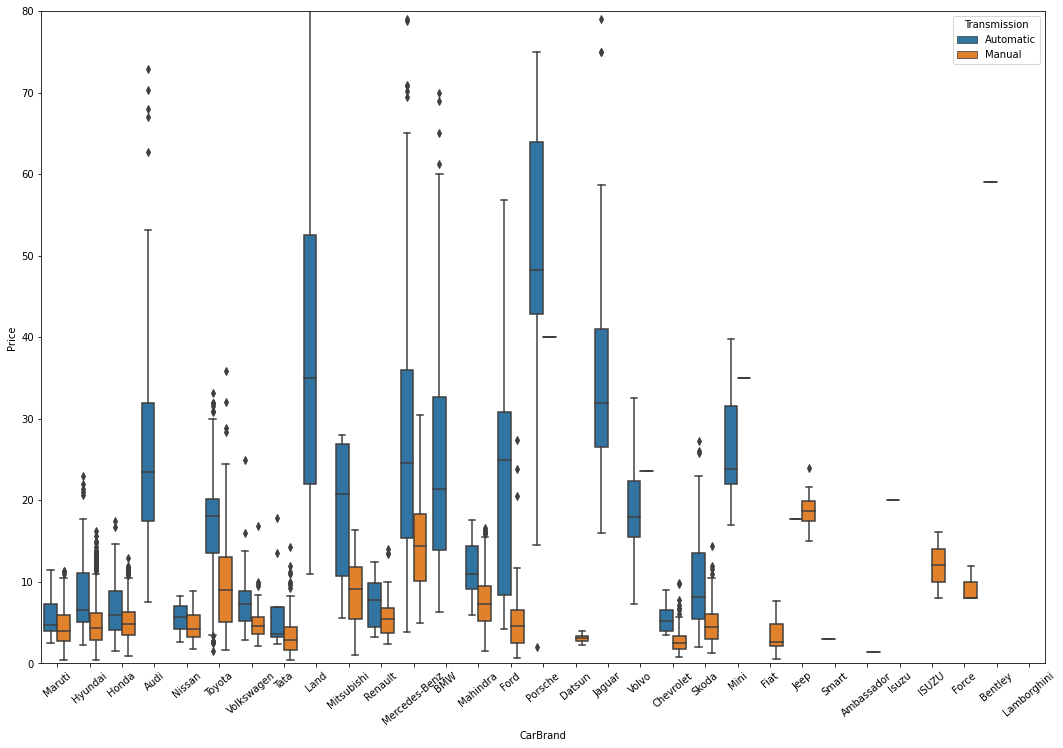

In [43]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=40)

plt.ylim(0, 80)
sns.boxplot(y='Price', x='CarBrand', data=df,hue=df.Transmission)

## Price and owner type in manual and automatic cars

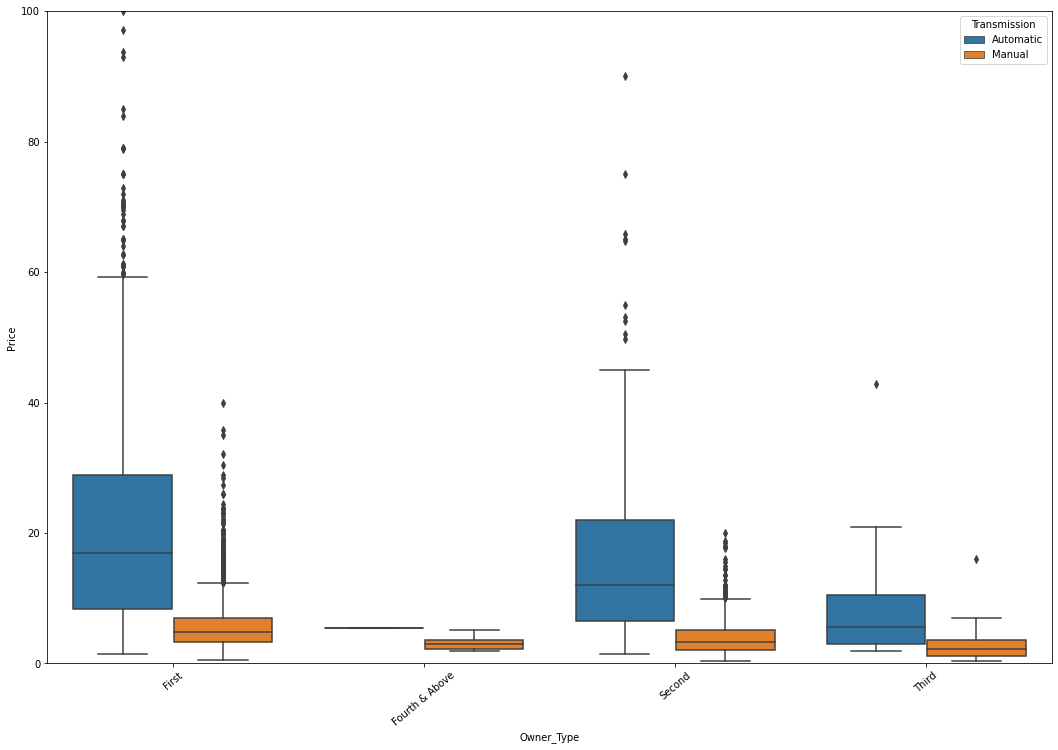

In [44]:
plt.figure(figsize=(18,12))
plt.xticks(rotation=40)

plt.ylim(0, 100)
sns.boxplot(y='Price', x='Owner_Type', data=df,hue=df.Transmission)

## Insight on Outlier

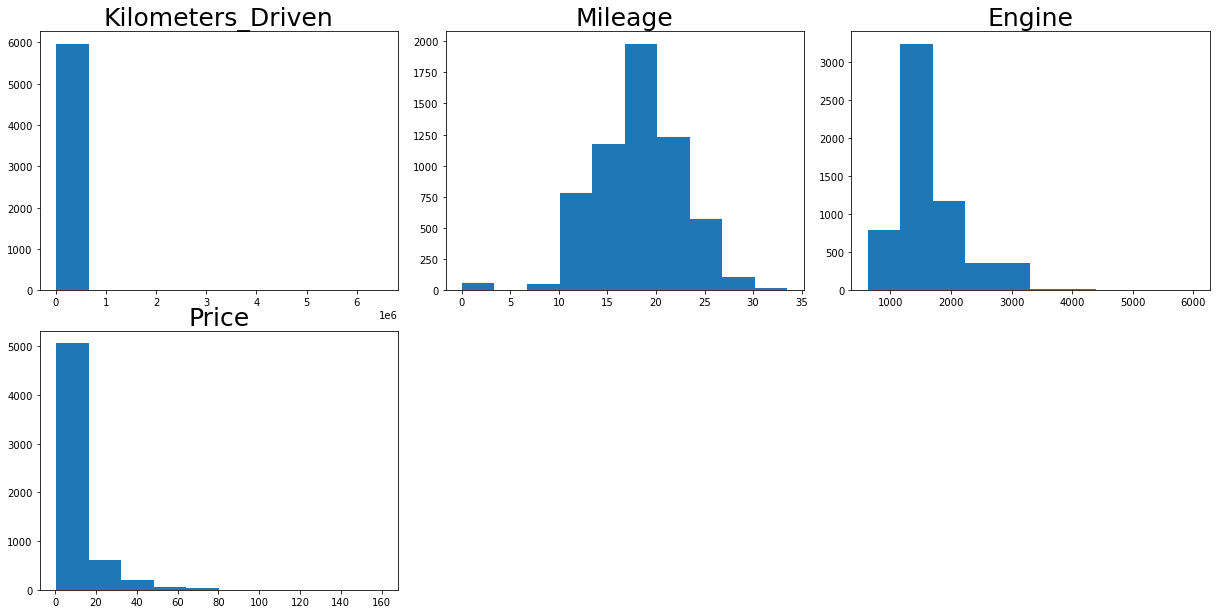

In [45]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

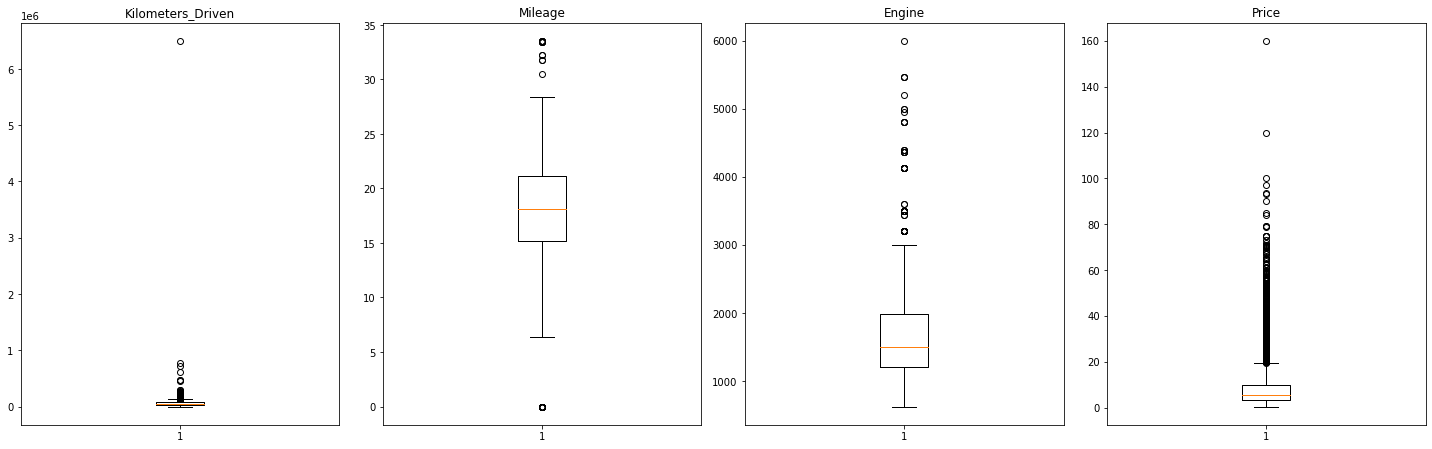

In [46]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(all_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Outlier Treatment

In [47]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

## Treating Outliers

In [48]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

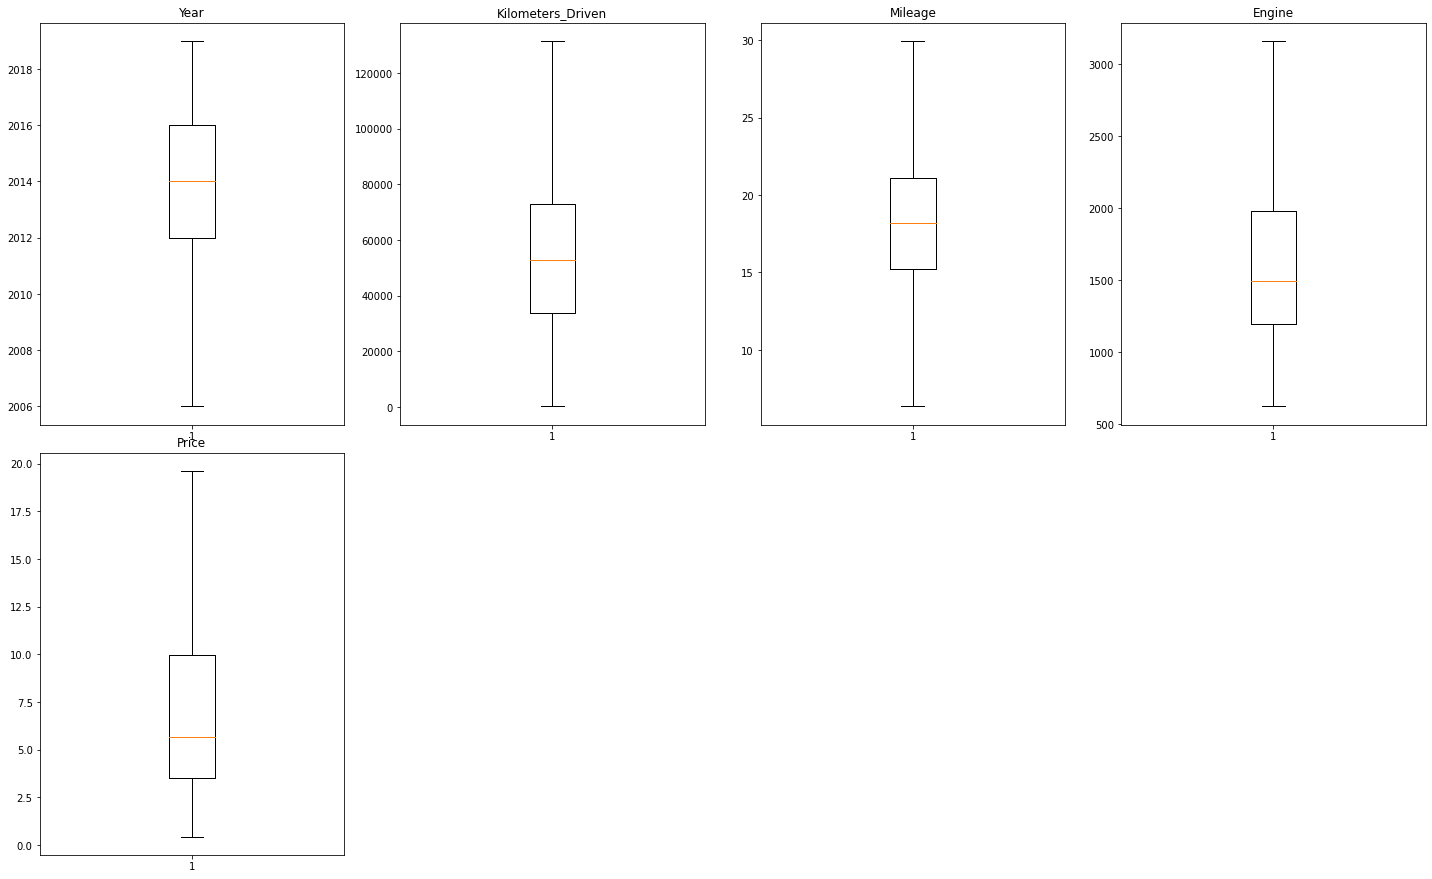

In [49]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [50]:
q1 = df['Mileage'].quantile(0.25)
q1

15.2

## Tukey's method calculating the Outlier

In [51]:
#Tukey's method calculating the Outlier
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Mileage")
print(probable_outliers_tm)


[]


In [52]:
print(possible_outliers_tm)

[14, 67, 79, 259, 304, 421, 440, 541, 628, 644, 704, 910, 957, 991, 1054, 1254, 1264, 1266, 1302, 1325, 1338, 1347, 1411, 1755, 1848, 2043, 2049, 2118, 2254, 2328, 2355, 2579, 2661, 2681, 3010, 3021, 3038, 3070, 3096, 3106, 3166, 3187, 3248, 3491, 3526, 3618, 3840, 4110, 4201, 4269, 4379, 4593, 4651, 4667, 4731, 4975, 4981, 5078, 5137, 5268, 5331, 5383, 5486, 5604, 5667, 5832, 5891, 5899, 5928, 5967]


# Build Model

In [53]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CarBrand,Carmodel
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600000,998.000000,58.16,5.000000,1.750000,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.000000,126.2,5.000000,12.500000,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.000000,88.7,5.000000,4.500000,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.000000,88.76,7.000000,6.000000,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.000000,140.8,5.000000,17.740000,Audi,A4 New 2.0 TDI Multitronic


In [54]:
#Defining X and y variables
X = df.drop(['Location','Price','Name','Power','CarBrand','Carmodel'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

   Year  Kilometers_Driven Fuel_Type Transmission Owner_Type   Mileage  \
0  2010              72000       CNG       Manual      First 26.600000   
1  2015              41000    Diesel       Manual      First 19.670000   
2  2011              46000    Petrol       Manual      First 18.200000   
3  2012              87000    Diesel       Manual      First 20.770000   
4  2013              40670    Diesel    Automatic     Second 15.200000   

       Engine    Seats  
0  998.000000 5.000000  
1 1582.000000 5.000000  
2 1199.000000 5.000000  
3 1248.000000 7.000000  
4 1968.000000 5.000000  
      Price
0  1.750000
1 12.500000
2  4.500000
3  6.000000
4 17.740000


In [55]:
print(X.shape)
print(y.shape)

(5975, 8)
(5975, 1)


In [65]:
#
#X = pd.get_dummies(X, columns=['Seats', 'Owner_Type'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.600000,998.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2015,41000,19.670000,1582.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,2011,46000,18.200000,1199.000000,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,2012,87000,20.770000,1248.000000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2013,40670,15.200000,1968.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [66]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)    

Intercept of the linear equation: [-1331.75389723]

COefficients of the equation are: [[ 6.65550667e-01 -1.59871311e-05 -1.73308170e-01  4.89906150e-03
   1.27414521e+00 -5.32907052e-15  6.96974849e-01 -1.01165003e+00
  -3.76048613e+00  6.86886209e-01  3.85429322e-01 -1.71074999e+00
  -4.76771975e+00 -3.13401677e+00 -4.41452391e+00 -8.91368642e+00
  -7.02038090e+00 -8.39153674e-01 -1.28899546e-01 -1.31145402e-01]]


In [68]:
X_train.shape

(4182, 20)

### Lets look at model performances

In [69]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

1.9988235792327715

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [70]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

2.683108919993378

In [71]:
# R-squared on test
r2_score(y_test, pred)

0.7796159729251614

In [72]:
# Training Score

linearregression.score(X_train, y_train)  # 70 % data 

0.8027175711451928

In [73]:
# Testing score

linearregression.score(X_test, y_test) # unseen data

0.7796159729251614

# Conclusion

- The training and testing scores are 80% and 77%, and both scores are comparable. Hence, the model is a good fit.

- $R^2$ is 0.77, that explains 77% of total variation in the dataset. So, overall the model is satisfactory.